In [2]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '/home/jw3514/Work/CellType_Psy/src')
from CellType_PSY import *
from tabulate import tabulate
#from brokenaxes import brokenaxes
import zipfile
from venn import venn
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol = LoadGeneINFO()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def oddsratio(NcaseMut, NctrlMut, dnvCount, Ncase = 24248, Nctrl=97322):
    if dnvCount!=dnvCount:
        dnvCount = 0
    NcaseMut += 1
    NctrlMut += 1
    AD = (NcaseMut) * (Nctrl-NctrlMut) 
    BC = (NctrlMut) * (Ncase-NcaseMut)
    return AD/BC + dnvCount

def Penetrance(NcaseMut, NctrlMut, Ncase = 24248, Nctrl=97322, prevelence=0.45/100):
    NcaseMut += 1
    NctrlMut += 1
    Ntotal_ =  Ncase/prevelence
    Nctrl_ = Ntotal_ - Ncase
    NctrlMut_ = Nctrl_*(NctrlMut/Nctrl)
    #print(Nctrl_, NctrlMut_)
    p = NcaseMut/(NcaseMut+NctrlMut_)
    return p

In [4]:
TopN_Genes = [60, 100, 200, 500, 800, 1000, 2000, 5000]

## Rare

### ASD

In [7]:
#Spark_Meta_1stage = pd.read_excel("~/Work/SPARK2020/TabS_DenovoWEST_Stage1.xlsx",
#                           skiprows=1, sheet_name="AllGenes")
Spark_Denovo = pd.read_excel("../../ASD_Circuits/notebooks_v2/dat_in/41588_2022_1148_MOESM4_ESM.xlsx",
                           skiprows=2, sheet_name="Table S7")
Spark_Denovo = Spark_Denovo[Spark_Denovo[
    "pDenovoWEST_Meta"]!="."]
Spark_Denovo_ExomeWide = Spark_Denovo[Spark_Denovo[
    "pDenovoWEST_Meta"]<=2.5e-6]
Spark_Denovo_ExomeWide.shape

FileNotFoundError: [Errno 2] No such file or directory: '../../ASD_Circuits/notebooks_v2/dat_in/41588_2022_1148_MOESM4_ESM.xlsx'

In [ ]:
Spark_Denovo_ExomeWide

NameError: name 'Spark_Denovo_ExomeWide' is not defined

In [60]:
Spark_Denovo.shape

(378, 56)

In [5]:
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/Rare/"
Prefix="ASD"
for topN in TopN_Genes:
    tmp_mut_df = Spark_Meta_1stage.head(topN)
    _, tmp_gw = Aggregate_Gene_Weights_ASD(tmp_mut_df, UsepLI=False)
    Dict2Fil(tmp_gw, "{}/GW.{}.top{}.txt".format(OutDIR, Prefix, topN))

### HighIQ LowIQ Count

In [62]:
ASD_Discov_Muts = pd.read_csv("../../ASD_Circuits/dat/genes/SPARK/ASD_Discov_DNVs.txt", delimiter="\t")
ASD_Discov_Trios = pd.read_csv("../../ASD_Circuits/dat/genes/SPARK/ASD_Discov_Trios.txt", delimiter="\t")

ASD_Rep_Muts = pd.read_csv("../../ASD_Circuits/dat/genes/SPARK/ASD_Rep_DNVs.txt", delimiter="\t")
ASD_Rep_Trios = pd.read_csv("../../ASD_Circuits/dat/genes/SPARK/ASD_Rep_Trios.txt", delimiter="\t")

ASD_Muts = pd.concat([ASD_Discov_Muts, ASD_Rep_Muts])
ASD_Trios = pd.concat([ASD_Discov_Trios, ASD_Rep_Trios])

In [63]:
ASC_IQ_dat = pd.read_excel("../../ASD_Circuits/doc/1-s2.0-S0092867419313984-mmc4.xlsx", sheet_name="Phenotype")
ASC_IQ_dat = ASC_IQ_dat[ASC_IQ_dat["Role"]=="Proband"]
ASC_IQ_dat = ASC_IQ_dat.dropna(subset=['IQ'])

Spark_IQ_dat = pd.read_csv("../../ASD_Phenotype/SPARK_Collection_Version6/core_descriptive_variables.csv")
Spark_IQ_dat = Spark_IQ_dat[Spark_IQ_dat["asd"]==True]
Spark_IQ_dat = Spark_IQ_dat.dropna(subset=['fsiq'])

/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_11742/1772506760.py:5: DtypeWarning: Columns (19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Spark_IQ_dat = pd.read_csv("../../ASD_Phenotype/SPARK_Collection_Version6/core_descriptive_variables.csv")


In [64]:
ASC_IQ_dat.head(2)

,Sample,Phenotype_ID,Sex,Role,IQ,age_of_walking,Categorical_intellectual_disability_status,ASDp_carrier,ASDndd_carrier
0,SSC02254,11000.p1,Male,Proband,65.0,11.0,Yes,No,No
2,SSC02178,11001.p1,Male,Proband,124.0,13.0,No,No,No


In [65]:
Spark_IQ_dat.head(2)

,subject_sp_id,family_sf_id,biomother_id,biofather_id,sex,asd,asd_diagnosis_confirmed,asd_validity_flag,depend_adult,age_at_registration_months,...,age_onset_mos,onset_concern,diagnosis_age,diagnosis_source_latest,regress_lang_y_n,regress_other_y_n,family_type,multiplex_type,monozygotic_twin,enrolled_multiple
7,SP0000063,SF0000027,SP0000051,SP0000241,Female,True,1.0,NaN,False,147.0,...,NaN,NaN,43.0,Team of health care professionals,NaN,NaN,Multiplex,multiplex-siblings,NaN,Twin
8,SP0000034,SF0000027,SP0000051,SP0000241,Male,True,1.0,NaN,False,130.0,...,NaN,NaN,26.0,Team of health care professionals,NaN,NaN,Multiplex,multiplex-siblings,NaN,NaN


In [66]:
def CountMut(DF):
    N_LGD, N_mis, N_Dmis, N_syn = 0,0,0,0
    for i, row in DF.iterrows():
        GeneEff = row["GeneEff"].split(";")[0]
        if GeneEff in ["frameshift", "splice_acceptor", "splice_donor", "start_lost", "stop_gained", "stop_lost"]:
            N_LGD += 1
        elif GeneEff == "missense":
            N_mis += 1
            row["REVEL"] = row["REVEL"].split(";")[0]
            if row["REVEL"] != ".":
                if float(row["REVEL"]) > 0.5:
                    N_Dmis += 1
        elif GeneEff == "synonymous":
            N_syn += 1
    return N_LGD, N_mis, N_Dmis, N_syn
def Mut2GeneDF(MutDF, PPVs = [0.554, 0.333, 0.138, 0.130], LGD=True, Dmis=True):
    genes = np.array(list(set(MutDF["HGNC"].values)))
    dat = []
    gene2MutN = {}
    for g in genes:
        try:
            Entrez = int(GeneSymbol2Entrez[g])
        except:
            Entrez = -1
            continue
        Muts = MutDF[MutDF["HGNC"]==g]
        try:
            pLI = float(Muts["ExACpLI"].values[0])
        except:
            pLI = 0
        N_LGD, N_Mis, N_Dmis, N_Syn = CountMut(Muts)
        if not LGD:
            N_LGD = 0
        if not Dmis:
            N_Dmis = 0
        if pLI > 0.5:
            gene2MutN[Entrez] = N_LGD * PPVs[0] + N_Dmis * PPVs[1]
        else:
            gene2MutN[Entrez] = N_LGD * PPVs[2] + N_Dmis * PPVs[3]
    return gene2MutN
def GetBiasDat(DF, STRs):
    biases = DF.loc[STRs, "EFFECT"].values
    return np.mean(biases)
def GetBootsDist(DFs, STRs):
    dat = []
    for df in DFs:
        tmp = []
        biases = df.loc[STRs, "EFFECT"].values
        dat.append(np.mean(biases))
    return np.array(dat)

In [67]:
ConfMuts = Filt_LGD_Mis(ASD_Muts, Dmis=True)
Mut_n_IQ = ConfMuts[["IID", "Sex", "Pheno", "VarID", "GeneID", "HGNC", "GeneEff", 
                        "REVEL", "ExACpLI"]]
ASC_IQ_search = ASC_IQ_dat.set_index("Phenotype_ID")
Spark_IQ_search = Spark_IQ_dat.set_index("subject_sp_id")

In [68]:
for i, row in Mut_n_IQ.iterrows():
    if row["HGNC"] not in GeneSymbol2Entrez:
        Mut_n_IQ.loc[i, "IQ"] = -1
        continue
    Mut_n_IQ.loc[i, "Entrez"] = int(GeneSymbol2Entrez[row["HGNC"]])
    IID = row["IID"]
    if IID in ASC_IQ_search.index.values:
        Mut_n_IQ.loc[i, "IQ"] = ASC_IQ_search.loc[IID, "IQ"]
    elif IID in Spark_IQ_search.index.values:
        Mut_n_IQ.loc[i, "IQ"] = Spark_IQ_search.loc[IID, "fsiq"]
    else:
        Mut_n_IQ.loc[i, "IQ"] = -1
Mut_n_IQ = Mut_n_IQ[Mut_n_IQ["IQ"]!=-1]
Mut_n_IQ["Entrez"] = [int(x) for x in Mut_n_IQ["Entrez"].values]
#Mut_n_IQ.shape

/tmp/ipykernel_11742/2187870227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mut_n_IQ.loc[i, "Entrez"] = int(GeneSymbol2Entrez[row["HGNC"]])
/tmp/ipykernel_11742/2187870227.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mut_n_IQ.loc[i, "IQ"] = -1


In [69]:
Mut_n_IQ.to_csv("../dat/ASD_IQ_Mut.csv", index=False)

In [70]:
Mut_n_IQ.head(2)

,IID,Sex,Pheno,VarID,GeneID,HGNC,GeneEff,REVEL,ExACpLI,Entrez,IQ
303,AU2793302,Female,Affected,15:65899519:G:A,ENSG00000138614,INTS14,missense,0.633,0.003093813,81556,74.0
430,AU3729303,Female,Affected,17:7230106:C:T,ENSG00000215041,NEURL4,missense,0.56,0.999976734,84461,76.0


In [71]:
Mut_n_IQ["Pheno"].unique()

array(['Affected'], dtype=object)

In [72]:
Mut_n_IQ["GeneEff"].unique()

array(['missense', 'frameshift', 'splice_donor', 'splice_acceptor',
       'stop_gained', 'start_lost', 'stop_lost'], dtype=object)

In [73]:
Mut_n_IQ.shape

(1862, 11)

In [74]:
Spark_Meta_1stage.head(2)

,GeneID,EntrezID,HGNC,CytoBand,ExACpLI,LoFOvsE,LOEUF,LOEUFbin,SynOvsE,sHet,...,MisEvents,MisDist,pMisCluster,pMisComb,pDenovoWEST,Total_Mut_w_IQ,HIQ.LGD,HIQ.Dmis,LIQ.LGD,LIQ.Dmis
0,ENSG00000143442,23126,POGZ,1q21.3,1,0.045859,0.119,0,0.97057,0.214955,...,4,170.7,0.00692,0.00583,0.0,3.0,3.0,0.0,0.0,0.0
1,ENSG00000169057,4204,MECP2,Xq28,0.69809,0.085755,0.407,1,2.0282,0.088203,...,13,170.9,0.00197,0.0,0.0,4.0,1.0,0.0,2.0,1.0


In [75]:
def isLGD(row):
    if row["GeneEff"] in ["frameshift", "splice_acceptor", "splice_donor", "start_lost", "stop_gained", "stop_lost"]:
        return True
    else:
        return False
def isDmis(row):
    try:
        revel = float(row["REVEL"])
    except:
        revel = 0
    if row["GeneEff"] == "missense" and revel >= 0.5:
        return True
    else:
        return False
def Split_IQ_MutType(df):
    N_HIQ_LGD, N_HIQ_Dmis, N_LIQ_LGD, N_LIQ_Dmis = 0,0,0,0
    for i, row in df.iterrows():
        IQ = row["IQ"]
        if IQ > 70:
            if isLGD(row):
                N_HIQ_LGD += 1
            elif isDmis(row):
                N_HIQ_Dmis += 1
        elif IQ <=70:
            if isLGD(row):
                N_LIQ_LGD += 1
            elif isDmis(row):
                N_LIQ_Dmis += 1
    return  N_HIQ_LGD, N_HIQ_Dmis, N_LIQ_LGD, N_LIQ_Dmis 

In [76]:
for i, row in Spark_Meta_1stage.iterrows():
    Entrez = row["EntrezID"]
    Entrez_Mut_IQ = Mut_n_IQ[Mut_n_IQ["Entrez"]==Entrez]
    Total_Mut_w_IQ = Entrez_Mut_IQ.shape[0]
    Spark_Meta_1stage.loc[i, "Total_Mut_w_IQ"] = Total_Mut_w_IQ
    N_HIQ_LGD, N_HIQ_Dmis, N_LIQ_LGD, N_LIQ_Dmis = Split_IQ_MutType(Entrez_Mut_IQ)
    Spark_Meta_1stage.loc[i, "HIQ.LGD"] = N_HIQ_LGD
    Spark_Meta_1stage.loc[i, "HIQ.Dmis"] = N_HIQ_Dmis
    Spark_Meta_1stage.loc[i, "LIQ.LGD"] = N_LIQ_LGD
    Spark_Meta_1stage.loc[i, "LIQ.Dmis"] = N_LIQ_Dmis
    #print(row["HGNC"], Entrez_Mut_IQ.shape[0])

In [77]:
Spark_Meta_1stage_iq_filt = Spark_Meta_1stage[Spark_Meta_1stage["Total_Mut_w_IQ"]>0]

In [78]:
Spark_Meta_1stage_iq_filt["HIQ.Mut"] = Spark_Meta_1stage_iq_filt["HIQ.LGD"] + Spark_Meta_1stage_iq_filt["HIQ.Dmis"]
Spark_Meta_1stage_iq_filt["LIQ.Mut"] = Spark_Meta_1stage_iq_filt["LIQ.LGD"] + Spark_Meta_1stage_iq_filt["LIQ.Dmis"]
Spark_Meta_1stage_hiq = Spark_Meta_1stage_iq_filt[Spark_Meta_1stage_iq_filt["HIQ.Mut"]>0]
Spark_Meta_1stage_liq = Spark_Meta_1stage_iq_filt[Spark_Meta_1stage_iq_filt["LIQ.Mut"]>0]
print(Spark_Meta_1stage_hiq.shape[0], Spark_Meta_1stage_liq.shape[0])

994 606


/tmp/ipykernel_11742/3018351353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spark_Meta_1stage_iq_filt["HIQ.Mut"] = Spark_Meta_1stage_iq_filt["HIQ.LGD"] + Spark_Meta_1stage_iq_filt["HIQ.Dmis"]
/tmp/ipykernel_11742/3018351353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spark_Meta_1stage_iq_filt["LIQ.Mut"] = Spark_Meta_1stage_iq_filt["LIQ.LGD"] + Spark_Meta_1stage_iq_filt["LIQ.Dmis"]


In [79]:
Spark_Meta_1stage_liq.head(2)

,GeneID,EntrezID,HGNC,CytoBand,ExACpLI,LoFOvsE,LOEUF,LOEUFbin,SynOvsE,sHet,...,pMisCluster,pMisComb,pDenovoWEST,Total_Mut_w_IQ,HIQ.LGD,HIQ.Dmis,LIQ.LGD,LIQ.Dmis,HIQ.Mut,LIQ.Mut
1,ENSG00000169057,4204,MECP2,Xq28,0.69809,0.085755,0.407,1,2.0282,0.088203,...,0.00197,0.0,0.0,4.0,1.0,0.0,2.0,1.0,1.0,3.0
2,ENSG00000136531,6326,SCN2A,2q24.3,1,0.060487,0.127,0,1.0084,0.257771,...,0.27,0.0,0.0,12.0,0.0,3.0,5.0,4.0,3.0,9.0


In [80]:
def Mut2GeneDF(GeneDF, IQ, PPVs = [0.554, 0.333, 0.138, 0.130]):
    genes = GeneDF["HGNC"].values
    gene2MutN = {}
    for i, row in GeneDF.iterrows():
        Entrez = row["EntrezID"]
        try:
            pLI = float(Muts["ExACpLI"].values[0])
        except:
            pLI = 0
        if IQ == "High":
            N_LGD = row["HIQ.LGD"]
            N_Dmis = row["HIQ.Dmis"]
        elif IQ == "Low":
            N_LGD = row["LIQ.LGD"]
            N_Dmis = row["LIQ.Dmis"]
        else:
            print("Wrong Attribute IQ")
        if pLI > 0.5:
            gene2MutN[Entrez] = N_LGD * PPVs[0] + N_Dmis * PPVs[1]
        else:
            gene2MutN[Entrez] = N_LGD * PPVs[2] + N_Dmis * PPVs[3]
    return gene2MutN

In [86]:
PPV_nopLI = [0.457, 0.231, 0.457, 0.231]

In [93]:
### Top 61 genes and their mutation counts, not use pLI

Spark_Denovo_ExomeWide.head(2)
top_Genes = Spark_Denovo_ExomeWide["HGNC"].values
HIQ_GeneDF = Spark_Meta_1stage_hiq[Spark_Meta_1stage_hiq["HGNC"].isin(top_Genes)]
LIQ_GeneDF = Spark_Meta_1stage_liq[Spark_Meta_1stage_liq["HGNC"].isin(top_Genes)]
print(HIQ_GeneDF.shape, LIQ_GeneDF.shape)

(42, 57) (51, 57)


In [94]:
HIQ_GW = Mut2GeneDF(HIQ_GeneDF, "High")
LIQ_GW = Mut2GeneDF(LIQ_GeneDF, "Low")
OutDIR = "../dat/GeneWeights/"
Dict2Fil(HIQ_GW, "{}/HIQ.top60.nopLI.gw".format(OutDIR))
Dict2Fil(LIQ_GW, "{}/LIQ.top60.nopLI.gw".format(OutDIR))

In [88]:
HIQ_GeneDF.head(2)

,GeneID,EntrezID,HGNC,CytoBand,ExACpLI,LoFOvsE,LOEUF,LOEUFbin,SynOvsE,sHet,...,pMisCluster,pMisComb,pDenovoWEST,Total_Mut_w_IQ,HIQ.LGD,HIQ.Dmis,LIQ.LGD,LIQ.Dmis,HIQ.Mut,LIQ.Mut
0,ENSG00000143442,23126,POGZ,1q21.3,1,0.045859,0.119,0,0.97057,0.214955,...,0.00692,0.00583,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0
1,ENSG00000169057,4204,MECP2,Xq28,0.69809,0.085755,0.407,1,2.0282,0.088203,...,0.00197,0.0,0.0,4.0,1.0,0.0,2.0,1.0,1.0,3.0


In [91]:
### top 500 Genes with IQ 
HIQ_GeneDF = Spark_Meta_1stage_hiq.head(500)
LIQ_GeneDF = Spark_Meta_1stage_liq.head(500)
HIQ_GW = Mut2GeneDF(HIQ_GeneDF, "High", PPVs=PPV_nopLI)
LIQ_GW = Mut2GeneDF(LIQ_GeneDF, "Low", PPVs=PPV_nopLI)
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/Rare/"
Dict2Fil(HIQ_GW, "{}/HIQ.top500.gw".format(OutDIR))
Dict2Fil(LIQ_GW, "{}/LIQ.top500.gw".format(OutDIR))

In [82]:
HIQ_GeneDF.head(189)

,GeneID,EntrezID,HGNC,CytoBand,ExACpLI,LoFOvsE,LOEUF,LOEUFbin,SynOvsE,sHet,...,pMisCluster,pMisComb,pDenovoWEST,Total_Mut_w_IQ,HIQ.LGD,HIQ.Dmis,LIQ.LGD,LIQ.Dmis,HIQ.Mut,LIQ.Mut
0,ENSG00000143442,23126,POGZ,1q21.3,1,0.045859,0.119,0,0.97057,0.214955,...,0.00692,0.00583,0.0,3.0,3.0,0.0,0.0,0.0,3.0,0.0
1,ENSG00000169057,4204,MECP2,Xq28,0.69809,0.085755,0.407,1,2.0282,0.088203,...,0.00197,0.0,0.0,4.0,1.0,0.0,2.0,1.0,1.0,3.0
2,ENSG00000136531,6326,SCN2A,2q24.3,1,0.060487,0.127,0,1.0084,0.257771,...,0.27,0.0,0.0,12.0,0.0,3.0,5.0,4.0,3.0,9.0
3,ENSG00000171862,5728,PTEN,10q23.31,0.97551,0.24093,0.507,2,1.0183,0.12616,...,0.00477,0.0,0.0,7.0,1.0,1.0,3.0,2.0,2.0,5.0
4,ENSG00000173575,1106,CHD2,15q26.1,1,0.027031,0.07,0,0.95212,0.172054,...,0.02,0.000021,0.0,6.0,2.0,1.0,2.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,ENSG00000177103,57453,DSCAML1,11q23.3,1,0.091288,0.165,0,1.1081,0.131593,...,0.56,0.88,0.00892,2.0,2.0,0.0,0.0,0.0,2.0,0.0
495,ENSG00000168092,5049,PAFAH1B2,11q23,0.96203,0.076641,0.364,1,0.99382,0.29989,...,.,0.25,0.00918,1.0,1.0,0.0,0.0,0.0,1.0,0.0
497,ENSG00000137343,79969,ATAT1,6p21.33,0.014374,0.53729,0.816,4,0.83874,0.015977,...,.,1,0.00924,2.0,1.0,0.0,1.0,0.0,1.0,1.0
499,ENSG00000005955,79893,GGNBP2,17q12,0.99993,0,0.073,0,0.93879,0.241791,...,.,1,0.00928,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [83]:
LIQ_GeneDF.head(164)

,GeneID,EntrezID,HGNC,CytoBand,ExACpLI,LoFOvsE,LOEUF,LOEUFbin,SynOvsE,sHet,...,pMisCluster,pMisComb,pDenovoWEST,Total_Mut_w_IQ,HIQ.LGD,HIQ.Dmis,LIQ.LGD,LIQ.Dmis,HIQ.Mut,LIQ.Mut
1,ENSG00000169057,4204,MECP2,Xq28,0.69809,0.085755,0.407,1,2.0282,0.088203,...,0.00197,0.0,0.0,4.0,1.0,0.0,2.0,1.0,1.0,3.0
2,ENSG00000136531,6326,SCN2A,2q24.3,1,0.060487,0.127,0,1.0084,0.257771,...,0.27,0.0,0.0,12.0,0.0,3.0,5.0,4.0,3.0,9.0
3,ENSG00000171862,5728,PTEN,10q23.31,0.97551,0.24093,0.507,2,1.0183,0.12616,...,0.00477,0.0,0.0,7.0,1.0,1.0,3.0,2.0,2.0,5.0
4,ENSG00000173575,1106,CHD2,15q26.1,1,0.027031,0.07,0,0.95212,0.172054,...,0.02,0.000021,0.0,6.0,2.0,1.0,2.0,1.0,3.0,3.0
5,ENSG00000157540,1859,DYRK1A,21q22.13,0.99958,0.082845,0.214,0,1.1509,0.129493,...,.,1,0.0,5.0,3.0,0.0,2.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,ENSG00000130300,83483,PLVAP,19p13.11,0.000801,0.59994,0.972,5,1.1146,0.015625,...,0.52,0.23,0.00885,1.0,0.0,0.0,1.0,0.0,0.0,1.0
491,ENSG00000100722,79882,ZC3H14,14q31.3,0.99979,0.18945,0.342,1,1.1943,0.147911,...,.,1,0.00908,1.0,0.0,0.0,1.0,0.0,0.0,1.0
494,ENSG00000115275,7841,MOGS,2p13.1,0.0,0.6644,0.957,5,1.0461,0.012924,...,0.22,0.56,0.00917,1.0,0.0,0.0,1.0,0.0,0.0,1.0
497,ENSG00000137343,79969,ATAT1,6p21.33,0.014374,0.53729,0.816,4,0.83874,0.015977,...,.,1,0.00924,2.0,1.0,0.0,1.0,0.0,1.0,1.0


In [84]:
HIQ_GeneDF = Spark_Meta_1stage_hiq.head(61)
LIQ_GeneDF = Spark_Meta_1stage_liq.head(61)
HIQ_GW = Mut2GeneDF(HIQ_GeneDF, "High")
LIQ_GW = Mut2GeneDF(LIQ_GeneDF, "Low")
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/Rare/"
Dict2Fil(HIQ_GW, "{}/HIQ.top61.gw".format(OutDIR))
Dict2Fil(LIQ_GW, "{}/LIQ.top61.gw".format(OutDIR))

In [85]:
Spark_top500_Genes = Spark_Meta_1stage.head(500)["EntrezID"].values

In [32]:
HIQ_GeneDF = Spark_Meta_1stage_hiq[Spark_Meta_1stage_hiq["EntrezID"].isin(Spark_top500_Genes)]
LIQ_GeneDF = Spark_Meta_1stage_liq[Spark_Meta_1stage_liq["EntrezID"].isin(Spark_top500_Genes)]
HIQ_GW = Mut2GeneDF(HIQ_GeneDF, "High")
LIQ_GW = Mut2GeneDF(LIQ_GeneDF, "Low")
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/Rare/"
Dict2Fil(HIQ_GW, "{}/HIQ.top{}.gw".format(OutDIR, HIQ_GeneDF.shape[0]))
Dict2Fil(LIQ_GW, "{}/LIQ.top{}.gw".format(OutDIR, LIQ_GeneDF.shape[0]))

### SCZ

##### modify Mutation Tab

In [28]:
GeneDF = pd.read_excel("/home/jw3514/Work/ASD_Circuits/dat/genes/scz/41586_2022_4556_MOESM3_ESM.xlsx",
                    sheet_name="Table S5 - Gene Results")
ExAC_pLI = pd.read_csv("/home/jw3514/Work/Resources/gnomad.v2.1.1.lof_metrics.by_gene.txt", sep="\t",
                      index_col="gene")

In [29]:
Ncase = 24248
Nctrl=97322
Ncase/(Ncase + Nctrl)

0.19945710290367688

In [35]:
NcaseMut = 15
NctrlMut = 3
prevelence = 0.01

Ntotal_ =  Ncase/prevelence
print(Ntotal_)
Nctrl_ = Ntotal_ - Ncase
NctrlMut_ = Nctrl_*(NctrlMut/Nctrl)
print(Nctrl_, NctrlMut_)
p = NcaseMut/(NcaseMut+NctrlMut_)
print(p)

2424800.0
2400552.0 73.99823267092744
0.1685426727007352


In [31]:
def ModifyMutCount(CaseCount, ContCount, dnvCount, CaseN=24248, ContN=97322):
    if dnvCount!=dnvCount:
        dnvCount = 0
    return max(CaseCount - ContCount / ContN * CaseN + dnvCount, 0)

for i, row in GeneDF.iterrows():
    symbol = GeneDF.loc[i, "Gene Symbol"]
    try:
        GeneDF.loc[i, "Entrez"] = int(GeneSymbol2Entrez[symbol])
    except:
        GeneDF.loc[i, "Entrez"] = None
    try:
        GeneDF.loc[i, "pLI"] = ExAC_pLI.loc[symbol, "pLI"]
    except:
        GeneDF.loc[i, "pLI"] = 0
        
    
    GeneDF.loc[i, "nLGD"] = ModifyMutCount(GeneDF.loc[i, "Case PTV"], 
                                    GeneDF.loc[i, "Ctrl PTV"], GeneDF.loc[i, "De novo PTV"]) 
    GeneDF.loc[i, "nMis3"] = ModifyMutCount(GeneDF.loc[i, "Case mis3"], 
                                    GeneDF.loc[i, "Ctrl mis3"], GeneDF.loc[i, "De novo mis3"]) 
    GeneDF.loc[i, "nMis2"] = ModifyMutCount(GeneDF.loc[i, "Case mis2"], 
                                    GeneDF.loc[i, "Ctrl mis2"], GeneDF.loc[i, "De novo mis2"]) 
    GeneDF.loc[i, "LGD_OR"] = oddsratio(GeneDF.loc[i, "Case PTV"], 
                                    GeneDF.loc[i, "Ctrl PTV"], GeneDF.loc[i, "De novo PTV"])
    GeneDF.loc[i, "Mis3_OR"] = oddsratio(GeneDF.loc[i, "Case mis3"], 
                                    GeneDF.loc[i, "Ctrl mis3"], GeneDF.loc[i, "De novo mis3"])
    GeneDF.loc[i, "Mis2_OR"] = oddsratio(GeneDF.loc[i, "Case mis2"], 
                                    GeneDF.loc[i, "Ctrl mis2"], GeneDF.loc[i, "De novo mis2"])
    
    GeneDF.loc[i, "LGD_pen"] = Penetrance(GeneDF.loc[i, "Case PTV"], 
                                    GeneDF.loc[i, "Ctrl PTV"])
    GeneDF.loc[i, "Mis3_pen"] = Penetrance(GeneDF.loc[i, "Case mis3"], 
                                    GeneDF.loc[i, "Ctrl mis3"])
    GeneDF.loc[i, "Mis2_pen"] = Penetrance(GeneDF.loc[i, "Case mis2"], 
                                    GeneDF.loc[i, "Ctrl mis2"])
    
GeneDF = GeneDF.dropna(subset="Entrez")
GeneDF = GeneDF.set_index("Entrez")
#GeneDF = GeneDF[GeneDF.index.isin(CT_Z2_MAT_HC.index.values)]
GeneDF.to_csv("../dat/Genetics/SCZ.ALLGENE.MutCountModified.csv")
GeneDF.shape

/tmp/ipykernel_627090/1595871980.py:13: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  GeneDF.loc[i, "pLI"] = ExAC_pLI.loc[symbol, "pLI"]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

##### [end] modify Mutation Tab

In [11]:
SCZ_GeneMuts = pd.read_csv("../../CellType_Psy/dat3/SCZ.ALLGENE.MutCountModified.csv", index_col="Entrez")
SCZ_GeneMuts.index = [int(x) for x in SCZ_GeneMuts.index.values]

In [14]:
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/Rare/"
Prefix="SCZ"
for topN in TopN_Genes:
    tmp_mut_df = SCZ_GeneMuts.head(topN)
    tmp_gw = Aggregate_Gene_Weights_SCZ_Daly2(tmp_mut_df, usepLI=False)
    Dict2Fil(tmp_gw, "{}/GW.{}.top{}.txt".format(OutDIR, Prefix, topN))

ORMC
9739 Error converting Entrez ID
8454 Error converting Entrez ID
23039 Error converting Entrez ID
7204 Error converting Entrez ID
8913 Error converting Entrez ID
6671 Error converting Entrez ID
2892 Error converting Entrez ID
2903 Error converting Entrez ID
8925 Error converting Entrez ID
9821 Error converting Entrez ID
10021 Error converting Entrez ID
11215 Error converting Entrez ID
7695 Error converting Entrez ID
23524 Error converting Entrez ID
4306 Error converting Entrez ID
7750 Error converting Entrez ID
23196 Error converting Entrez ID
55719 Error converting Entrez ID
23135 Error converting Entrez ID
26052 Error converting Entrez ID
55870 Error converting Entrez ID
10274 Error converting Entrez ID
3008 Error converting Entrez ID
5550 Error converting Entrez ID
9947 Error converting Entrez ID
9863 Error converting Entrez ID
747 Error converting Entrez ID
81300 Error converting Entrez ID
55867 Error converting Entrez ID
23253 Error converting Entrez ID
9900 Error converting E

26050 Error converting Entrez ID
203427 Error converting Entrez ID
6286 Error converting Entrez ID
84945 Error converting Entrez ID
8934 Error converting Entrez ID
196441 Error converting Entrez ID
64224 Error converting Entrez ID
23369 Error converting Entrez ID
253430 Error converting Entrez ID
23499 Error converting Entrez ID
54726 Error converting Entrez ID
23394 Error converting Entrez ID
10675 Error converting Entrez ID
10477 Error converting Entrez ID
23418 Error converting Entrez ID
477 Error converting Entrez ID
3148 Error converting Entrez ID
8842 Error converting Entrez ID
79736 Error converting Entrez ID
4974 Error converting Entrez ID
23598 Error converting Entrez ID
4850 Error converting Entrez ID
9378 Error converting Entrez ID
3718 Error converting Entrez ID
6594 Error converting Entrez ID
8848 Error converting Entrez ID
8208 Error converting Entrez ID
6262 Error converting Entrez ID
1209 Error converting Entrez ID
5442 Error converting Entrez ID
84328 Error converting 

401145 Error converting Entrez ID
7273 Error converting Entrez ID
286530 Error converting Entrez ID
1026 Error converting Entrez ID
129401 Error converting Entrez ID
6505 Error converting Entrez ID
5507 Error converting Entrez ID
90637 Error converting Entrez ID
65999 Error converting Entrez ID
7026 Error converting Entrez ID
10392 Error converting Entrez ID
10720 Error converting Entrez ID
7126 Error converting Entrez ID
54796 Error converting Entrez ID
165215 Error converting Entrez ID
8165 Error converting Entrez ID
5425 Error converting Entrez ID
4168 Error converting Entrez ID
339175 Error converting Entrez ID
140 Error converting Entrez ID
124773 Error converting Entrez ID
815 Error converting Entrez ID
7697 Error converting Entrez ID
57337 Error converting Entrez ID
10198 Error converting Entrez ID
2909 Error converting Entrez ID
8227 Error converting Entrez ID
7805 Error converting Entrez ID
56171 Error converting Entrez ID
55062 Error converting Entrez ID
132671 Error converti

79960 Error converting Entrez ID
55231 Error converting Entrez ID
10089 Error converting Entrez ID
55659 Error converting Entrez ID
9616 Error converting Entrez ID
10743 Error converting Entrez ID
1299 Error converting Entrez ID
79738 Error converting Entrez ID
10333 Error converting Entrez ID
3150 Error converting Entrez ID
55683 Error converting Entrez ID
132112 Error converting Entrez ID
85002 Error converting Entrez ID
400451 Error converting Entrez ID
148418 Error converting Entrez ID
283385 Error converting Entrez ID
55626 Error converting Entrez ID
6272 Error converting Entrez ID
6405 Error converting Entrez ID
127343 Error converting Entrez ID
481 Error converting Entrez ID
5822 Error converting Entrez ID
326624 Error converting Entrez ID
7922 Error converting Entrez ID
201305 Error converting Entrez ID
9521 Error converting Entrez ID
54754 Error converting Entrez ID
5913 Error converting Entrez ID
2954 Error converting Entrez ID
6091 Error converting Entrez ID
9993 Error conve

ORMC
9739 Error converting Entrez ID
8454 Error converting Entrez ID
23039 Error converting Entrez ID
7204 Error converting Entrez ID
8913 Error converting Entrez ID
6671 Error converting Entrez ID
2892 Error converting Entrez ID
2903 Error converting Entrez ID
8925 Error converting Entrez ID
9821 Error converting Entrez ID
10021 Error converting Entrez ID
11215 Error converting Entrez ID
7695 Error converting Entrez ID
23524 Error converting Entrez ID
4306 Error converting Entrez ID
7750 Error converting Entrez ID
23196 Error converting Entrez ID
55719 Error converting Entrez ID
23135 Error converting Entrez ID
26052 Error converting Entrez ID
55870 Error converting Entrez ID
10274 Error converting Entrez ID
3008 Error converting Entrez ID
5550 Error converting Entrez ID
9947 Error converting Entrez ID
9863 Error converting Entrez ID
747 Error converting Entrez ID
81300 Error converting Entrez ID
55867 Error converting Entrez ID
23253 Error converting Entrez ID
9900 Error converting E

23221 Error converting Entrez ID
126295 Error converting Entrez ID
6357 Error converting Entrez ID
624 Error converting Entrez ID
5446 Error converting Entrez ID
80764 Error converting Entrez ID
9988 Error converting Entrez ID
374868 Error converting Entrez ID
200424 Error converting Entrez ID
525 Error converting Entrez ID
1123 Error converting Entrez ID
4817 Error converting Entrez ID
58191 Error converting Entrez ID
442191 Error converting Entrez ID
9570 Error converting Entrez ID
79096 Error converting Entrez ID
57677 Error converting Entrez ID
9682 Error converting Entrez ID
5980 Error converting Entrez ID
23368 Error converting Entrez ID
79642 Error converting Entrez ID
2258 Error converting Entrez ID
11017 Error converting Entrez ID
3645 Error converting Entrez ID
25948 Error converting Entrez ID
11183 Error converting Entrez ID
3631 Error converting Entrez ID
80207 Error converting Entrez ID
8972 Error converting Entrez ID
4665 Error converting Entrez ID
55089 Error converting 

57528 Error converting Entrez ID
2191 Error converting Entrez ID
23204 Error converting Entrez ID
51523 Error converting Entrez ID
259307 Error converting Entrez ID
150677 Error converting Entrez ID
51176 Error converting Entrez ID
348801 Error converting Entrez ID
64981 Error converting Entrez ID
131177 Error converting Entrez ID
79778 Error converting Entrez ID
2554 Error converting Entrez ID
91120 Error converting Entrez ID
100129842 Error converting Entrez ID
79858 Error converting Entrez ID
7184 Error converting Entrez ID
144501 Error converting Entrez ID
116369 Error converting Entrez ID
124626 Error converting Entrez ID
4133 Error converting Entrez ID
284217 Error converting Entrez ID
147965 Error converting Entrez ID
5594 Error converting Entrez ID
8600 Error converting Entrez ID
387273 Error converting Entrez ID
5062 Error converting Entrez ID
79191 Error converting Entrez ID
126637 Error converting Entrez ID
51237 Error converting Entrez ID
79834 Error converting Entrez ID
29

401647 Error converting Entrez ID
115727 Error converting Entrez ID
9578 Error converting Entrez ID
586 Error converting Entrez ID
1828 Error converting Entrez ID
344657 Error converting Entrez ID
80777 Error converting Entrez ID
60676 Error converting Entrez ID
9899 Error converting Entrez ID
5702 Error converting Entrez ID
3248 Error converting Entrez ID
390790 Error converting Entrez ID
1763 Error converting Entrez ID
5139 Error converting Entrez ID
390054 Error converting Entrez ID
57464 Error converting Entrez ID
285148 Error converting Entrez ID
8887 Error converting Entrez ID
2701 Error converting Entrez ID
84934 Error converting Entrez ID
85458 Error converting Entrez ID
60561 Error converting Entrez ID
128338 Error converting Entrez ID
10813 Error converting Entrez ID
153562 Error converting Entrez ID
200010 Error converting Entrez ID
219287 Error converting Entrez ID
89846 Error converting Entrez ID
22989 Error converting Entrez ID
5869 Error converting Entrez ID
253832 Error

### BP

##### modify Mutation Tab

In [15]:
df = pdf[.read_csv("../../data/Bipolar/Bipolar_gene_res.tsv", sep="\t")
df1 = ddf["group"]=="Bipolar Disorder"]
df2 = df[df["group"]=="Bipolar Disorder (including Schizoaffective)"]

In [23]:
# Annotate genes and combine p from dmis and PTV
for i, row in df1.iterrows():
    gene_id = row["gene_id"]
    gene_entrez = ENSID2Entrez.get(gene_id, 0)
    gene_symbol = Entrez2Symbol.get(gene_entrez, ".")
    ncase = row["n_cases"] 
    ncont = row["n_controls"] 
    df1.loc[i, "EntrezID"] = gene_entrez
    df1.loc[i, "Symbol"] = gene_symbol
    #print(gene_entrez, gene_symbol)
    _, fisherP = scipy.stats.combine_pvalues([row["damaging_missense_fisher_gnom_non_psych_pval"], 
                                    row["ptv_fisher_gnom_non_psych_pval"]])
    #print(fisherP)
    Eff_LGD = row["ptv_case_count"] - row["ptv_control_count"]/ncont*ncase
    Eff_Dmis = row["damaging_missense_case_count"] - row["damaging_missense_control_count"]/ncont*ncase
    df1.loc[i, "Pcombine"] = fisherP
    df1.loc[i, "Effect.LGD"] = max(0, Eff_LGD)
    df1.loc[i, "Effect.Dmis"] = max(0, Eff_Dmis)
    
    df1.loc[i, "LGD_OR"] = oddsratio(df1.loc[i, "ptv_case_count"], 
                            df1.loc[i, "ptv_control_count"], 0, 
                                        Ncase = ncase, Nctrl=ncont)
    df1.loc[i, "Dmis_OR"] = oddsratio(df1.loc[i, "damaging_missense_case_count"], 
                            df1.loc[i, "damaging_missense_control_count"], 0,
                                        Ncase = ncase, Nctrl=ncont)
    
df1 = df1.sort_values("Pcombine", ascending=True)
df1 = df1[(df1["Effect.LGD"]>0) | (df1["Effect.Dmis"]>0)]
df1["EntrezID"] = [int(x) for x in df1["EntrezID"].values]
df1.to_csv("../dat/Genetics/bipolar.genes.modified.csv")

In [25]:
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/Rare/"
Prefix="BP"
for topN in TopN_Genes:
    tmp_mut_df = df1.head(topN)
    tmp_gw = Aggregate_Gene_Weights_Bipolar(tmp_mut_df, usepLI=False)
    Dict2Fil(tmp_gw, "{}/GW.{}.top{}.txt".format(OutDIR, Prefix, topN))

##### [end] modify Mutation Tab

### UKBB Cognition

In [39]:
CogDF = pd.read_excel("../../data/Cognitive/41588_2023_1398_MOESM3_ESM.xlsx", sheet_name="Table S4")
CogDF = CogDF[CogDF["POPULATION"]=="EUR"]

In [40]:
def DF2GW_UKBB(DF, Ncarrier=True):
    res = {}
    for i, row in DF.iterrows():
        entrez = int(GeneSymbol2Entrez.get(row["GENE"], 0))
        if entrez == 0 :
            continue
        if Ncarrier:
            res[entrez] = abs(row["BETA"]) * row["NCARRIER"]
        else:
            res[entrez] = abs(row["BETA"]) 
    return res

In [45]:
topN = 1000
VNR_DF = CogDF[CogDF["PHENOTYPE"]=="VNR"]
VNR_Pos_DF = VNR_DF[VNR_DF["BETA"]>0]
VNR_Neg_DF = VNR_DF[VNR_DF["BETA"]<0]

VNR_Neg_DF = VNR_Neg_DF.sort_values("BETA")
VNR_Pos_DF = VNR_Pos_DF.sort_values("BETA")

VNR_Pos_GW = DF2GW_UKBB(VNR_Pos_DF, Ncarrier=False)
VNR_Neg_GW = DF2GW_UKBB(VNR_Neg_DF, Ncarrier=False)
Dict2Fil(VNR_Pos_GW, "../dat/UKBB_VNR_Pos_GW_{}.csv".format(topN))
Dict2Fil(VNR_Neg_GW, "../dat/UKBB_VNR_Neg_GW_{}.csv".format(topN))

In [46]:
VNR_Neg_DF.head(10)

,POPULATION,PHENOTYPE,GENE,BETA,SE,P,NSAMPLE,NCARRIER
43091,EUR,VNR,RC3H2,-1.126244,0.229579,9.318501e-07,159026,16
45340,EUR,VNR,ARHGEF7,-0.974045,0.222662,1.217657e-05,159026,17
37818,EUR,VNR,NTNG1,-0.894942,0.265568,7.520756e-04,159026,12
43239,EUR,VNR,STPG3,-0.882726,0.290381,2.367053e-03,159026,10
41954,EUR,VNR,AC068533_4_CRCP,-0.865376,0.290616,2.904349e-03,159026,10
39403,EUR,VNR,TOP2B,-0.857664,0.245763,4.835052e-04,159026,14
42634,EUR,VNR,UQCRB,-0.838827,0.276891,2.450399e-03,159026,11
39234,EUR,VNR,CUL3,-0.829245,0.266003,1.824670e-03,159026,12
47822,EUR,VNR,CACNA1A,-0.824464,0.170508,1.330330e-06,159026,29
39833,EUR,VNR,ARMC8,-0.813308,0.290797,5.161403e-03,159026,10


## GWAS

In [189]:
def AnnoEntrez(DF, GeneSymbol2Entrez):
    for i, row in DF.iterrows():
        DF.loc[i, "Entrez"] = int(GeneSymbol2Entrez.get(row["GENE"], -1))
    DF["Entrez"] = [int(x) for x in DF["Entrez"].values]
    return DF
def Magma_Gene_Filt(DF, Zmin=0, Pmax=0.05):
    DF = DF[DF["Entrez"]!=-1]
    return DF[(DF["ZSTAT"]>Zmin)&(DF["P"]<Pmax)]
def Magma_Gene_Weights(DF):
    GW = {}
    for i, row in DF.iterrows():
        #try:
        #    g = int(row["Entrez"])
        #except:
        #    g = int(row["GENE"])
        if "Entrez" in row:
            g = int(row["Entrez"])
        elif "GENE" in row:
            g = int(row["GENE"])
        else:
            continue
        GW[g] = row["ZSTAT"]
    return GW
def Magma_Gene_Filt2(DF, topN=2000, Neg=False):
    try:
        DF = DF[DF["Entrez"]!=-1]
    except:
        DF = DF[DF["GENE"]!=-1]
    if Neg:
        DF["ZSTAT"] = -DF["ZSTAT"]
        DF = DF.sort_values("ZSTAT", ascending=False)
    #else:
    DF = DF[DF["ZSTAT"]>0]
    return DF.head(topN)
def GWAS_GW_TopNGenes(DF, outname, topN, Neg=False):
    if Neg:
        DF_GWAS_Filt = Magma_Gene_Filt2(DF, topN=topN, Neg=True)
    else:
        DF_GWAS_Filt = Magma_Gene_Filt2(DF, topN=topN)
    GW_Magma = Magma_Gene_Weights(DF_GWAS_Filt)
    Dict2Fil(GW_Magma, "{}.txt".format(outname))

In [106]:
DIR_Magma = "/home/jw3514/Work/PanInf/dat/dat/GWAS/GeneTest/"
Fil_ASD_GWAS_Magma = DIR_Magma + "asd.genetest.tsv"
DF_ASD_GWAS_Magma = pd.read_csv(Fil_ASD_GWAS_Magma, sep="\t")
DF_ASD_GWAS_Magma = AnnoEntrez(DF_ASD_GWAS_Magma, GeneSymbol2Entrez)
DF_ASD_GWAS_Magma = DF_ASD_GWAS_Magma.sort_values("P")
DF_ASD_GWAS_Magma = DF_ASD_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.ASD.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_ASD_GWAS_Magma, Prefix, topN=topN)

In [107]:
DIR_Magma = "/home/jw3514/Work/PanInf/dat/dat/GWAS/GeneTest/"
Fil_SCZ_GWAS_Magma = DIR_Magma + "scz.genetest.tsv"
DF_SCZ_GWAS_Magma = pd.read_csv(Fil_SCZ_GWAS_Magma, sep="\t")
DF_SCZ_GWAS_Magma = AnnoEntrez(DF_SCZ_GWAS_Magma, GeneSymbol2Entrez)
DF_SCZ_GWAS_Magma = DF_SCZ_GWAS_Magma.sort_values("P")
DF_SCZ_GWAS_Magma = DF_SCZ_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.SCZ.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_SCZ_GWAS_Magma, Prefix, topN=topN)

In [170]:
DIR_Magma = "/home/jw3514/Work/ASD_Circuits/GWAS/"
Fil_BP_GWAS_Magma = DIR_Magma + "SCZ.Wave3.core.magma.genes.out.tsv"
DF_BP_GWAS_Magma = pd.read_csv(Fil_BP_GWAS_Magma, sep="\t")
DF_BP_GWAS_Magma = DF_BP_GWAS_Magma.sort_values("P")
DF_BP_GWAS_Magma = DF_BP_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.SCZ_wave3_core.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_BP_GWAS_Magma, Prefix, topN=topN)

In [171]:
DIR_Magma = "/home/jw3514/Work/ASD_Circuits/GWAS/"
Fil_BP_GWAS_Magma = DIR_Magma + "SCZ_Wave3_core_5_5.magma.genes.out.tsv"
DF_BP_GWAS_Magma = pd.read_csv(Fil_BP_GWAS_Magma, sep="\t")
DF_BP_GWAS_Magma = DF_BP_GWAS_Magma.sort_values("P")
DF_BP_GWAS_Magma = DF_BP_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.SCZ_wave3_core_5_5.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_BP_GWAS_Magma, Prefix, topN=topN)

In [108]:
DIR_Magma = "/home/jw3514/Work/ASD_Circuits/GWAS/"
Fil_BP_GWAS_Magma = DIR_Magma + "BP.magma.genes.tsv"
DF_BP_GWAS_Magma = pd.read_csv(Fil_BP_GWAS_Magma, sep="\t")
DF_BP_GWAS_Magma = DF_BP_GWAS_Magma.sort_values("P")
DF_BP_GWAS_Magma = DF_BP_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.BP.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_BP_GWAS_Magma, Prefix, topN=topN)

In [109]:
DIR_Magma = "/home/jw3514/Work/ASD_Circuits/GWAS/"
Fil_ADHD_GWAS_Magma = DIR_Magma + "ADHD.magma.genes.tsv"
DF_ADHD_GWAS_Magma = pd.read_csv(Fil_ADHD_GWAS_Magma, sep="\t")
DF_ADHD_GWAS_Magma = DF_ADHD_GWAS_Magma.sort_values("P")
DF_ADHD_GWAS_Magma = DF_ADHD_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.ADHD.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_ADHD_GWAS_Magma, Prefix, topN=topN)

In [110]:
DIR_Magma = "/home/jw3514/Work/ASD_Circuits/GWAS/"
Fil_MDD_GWAS_Magma = DIR_Magma + "MDD.magma.genes.tsv"
DF_MDD_GWAS_Magma = pd.read_csv(Fil_MDD_GWAS_Magma, sep="\t")
DF_MDD_GWAS_Magma = DF_MDD_GWAS_Magma.sort_values("P")
DF_MDD_GWAS_Magma = DF_MDD_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.MDD.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_MDD_GWAS_Magma, Prefix, topN=topN)

In [184]:
### EDU should be Negative Genes
DIR_Magma = "/home/jw3514/Work/UNIMED/dat/Genetics/GWAS/MagmaGeneRes/"
Fil_GWAS_Magma = DIR_Magma + "Educational_Attainmen.magma.genes.out.tsv"
DF_GWAS_Magma = pd.read_csv(Fil_GWAS_Magma, sep="\t")
DF_GWAS_Magma = DF_GWAS_Magma.sort_values("P")
DF_GWAS_Magma = DF_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.EDU.top{}".format(OutDIR, topN)
    #GWAS_GW_TopNGenes(DF_GWAS_Magma, Prefix, topN=topN, Neg=True)
    GWAS_GW_TopNGenes(DF_GWAS_Magma, Prefix, topN=topN)

In [185]:
DIR_Magma = "/home/jw3514/Work/UNIMED/dat/Genetics/GWAS/MagmaGeneRes/"
Fil_GWAS_Magma = DIR_Magma + "Meta_12Psy.magma.genes.out.tsv"
DF_GWAS_Magma = pd.read_csv(Fil_GWAS_Magma, sep="\t")
DF_GWAS_Magma = DF_GWAS_Magma.sort_values("P")
DF_GWAS_Magma = DF_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.Meta_12Psy.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_GWAS_Magma, Prefix, topN=topN)

In [186]:
DIR_Magma = "/home/jw3514/Work/UNIMED/dat/Genetics/GWAS/MagmaGeneRes/"
Fil_GWAS_Magma = DIR_Magma + "Meta_11Psy_ExcSCZ.magma.genes.out.tsv"
DF_GWAS_Magma = pd.read_csv(Fil_GWAS_Magma, sep="\t")
DF_GWAS_Magma = DF_GWAS_Magma.sort_values("P")
DF_GWAS_Magma = DF_GWAS_Magma.reset_index()
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

for topN in TopN_Genes:
    Prefix="{}/GW.Meta_11Psy_ExcSCZ.top{}".format(OutDIR, topN)
    GWAS_GW_TopNGenes(DF_GWAS_Magma, Prefix, topN=topN)

In [190]:
# All Other
DisOrders = ["Anxiety", "OCD", "PD", "PTSD", "SCZ", "TS"]
for Disorder in DisOrders:   
    DIR_Magma = "/home/jw3514/Work/UNIMED/dat/Genetics/GWAS/MagmaGeneRes/"
    Fil_GWAS_Magma = DIR_Magma + "{}.magma.genes.out.tsv".format(Disorder)
    DF_GWAS_Magma = pd.read_csv(Fil_GWAS_Magma, sep="\t")
    DF_GWAS_Magma = DF_GWAS_Magma.sort_values("P")
    DF_GWAS_Magma = DF_GWAS_Magma.reset_index()
    OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"

    for topN in TopN_Genes:
        Prefix="{}/GW.{}.top{}".format(OutDIR, Disorder, topN)
        GWAS_GW_TopNGenes(DF_GWAS_Magma, Prefix, topN=topN)

In [111]:
SCZ_FM = pd.read_excel("/home/jw3514/Work/data/SCZ/GWAS_287_loci/2020-08-14908C-s11/Supplementary Table 14.xlsx",
                      sheet_name="ST14 Prioritised Single Gene")

In [115]:
gene_symbol = list(set(SCZ_FM["gene_symbol"].values))
Entrez = [int(GeneSymbol2Entrez[x]) for x in gene_symbol if x in GeneSymbol2Entrez]
len(Entrez)

In [119]:
GW_SCZ_FM = dict(zip(Entrez, [1]*len(Entrez)))
OutDIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/GWAS/"
Fname="{}/GW.SCZ_FM.53.txt".format(OutDIR)
Dict2Fil(GW_SCZ_FM, Fname)

## Other

#### gnomad 4.0

In [40]:
gnomad4 = pd.read_csv("/home/jw3514/Work/data/gnomad/gnomad.v4.0.constraint_metrics.tsv", sep="\t")

In [41]:
search_text = 'ENST'
gnomad4 = gnomad4[(gnomad4["transcript"].str.contains(search_text))]
gnomad4 = gnomad4[gnomad4["mane_select"]==True]

In [42]:
for i, row in gnomad4.iterrows():
    symbol = row["gene"]
    gnomad4.loc[i, "Entrez"] = int(GeneSymbol2Entrez.get(symbol, 0))
gnomad4 = gnomad4[gnomad4["Entrez"]!=0]
gnomad4 = gnomad4[["Entrez", "gene", "transcript", "lof_hc_lc.obs", "lof_hc_lc.exp", 
                   "lof.pLI", "lof.z_score", "mis.z_score"]]

In [43]:
gnomad4

,Entrez,gene,transcript,lof_hc_lc.obs,lof_hc_lc.exp,lof.pLI,lof.z_score,mis.z_score
0,1.0,A1BG,ENST00000263100,45.0,43.008,1.712900e-16,-0.257140,-0.869480
6,29974.0,A1CF,ENST00000373997,45.0,69.896,7.432800e-10,2.520400,1.228100
23,2.0,A2M,ENST00000318602,95.0,147.100,9.133100e-20,3.635500,2.745100
32,144568.0,A2ML1,ENST00000299698,146.0,175.890,1.573400e-40,1.886900,1.642700
45,127550.0,A3GALT2,ENST00000442999,41.0,26.534,1.007500e-06,-0.078825,-4.086400
...,...,...,...,...,...,...,...,...
210414,440590.0,ZYG11A,ENST00000371528,50.0,66.032,7.166000e-14,1.337900,0.989630
210428,79699.0,ZYG11B,ENST00000294353,28.0,71.507,6.554500e-01,4.354500,4.328200
210433,7791.0,ZYX,ENST00000322764,39.0,58.426,1.554800e-08,2.179700,0.055206
210443,23140.0,ZZEF1,ENST00000381638,153.0,338.100,2.819800e-09,8.520300,1.972100


SpearmanrResult(correlation=nan, pvalue=nan)


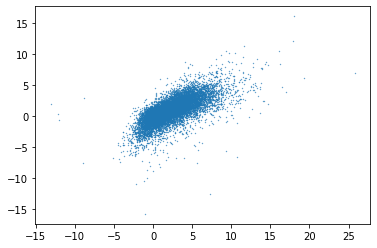

In [74]:
plt.scatter(gnomad4["lof.z_score"], gnomad4["mis.z_score"], s=0.1)

print(spearmanr(gnomad4["lof.z_score"], gnomad4["mis.z_score"]))

In [47]:
#### Rank genes by lofZ
gnomad4_lofz_rank = gnomad4.sort_values("lof.z_score", ascending=False)

In [48]:
gnomad4_lofz_rank

,Entrez,gene,transcript,lof_hc_lc.obs,lof_hc_lc.exp,lof.pLI,lof.z_score,mis.z_score
192273,7273.0,TTN,ENST00000589042,1461.0,3182.0000,3.047600e-90,25.806,6.97940
99243,23499.0,MACF1,ENST00000564288,174.0,828.1600,1.000000e+00,19.239,6.18680
53778,1778.0,DYNC1H1,ENST00000360184,53.0,550.3900,1.000000e+00,17.989,16.05300
97058,4035.0,LRP1,ENST00000243077,51.0,543.9800,1.000000e+00,17.889,12.01100
52970,667.0,DST,ENST00000680361,197.0,746.7900,1.000000e+00,17.021,3.91490
...,...,...,...,...,...,...,...,...
200096,165904.0,XIRP1,ENST00000340369,95.0,109.4400,NaN,NaN,0.36713
208493,79894.0,ZNF672,ENST00000306562,33.0,25.5810,NaN,NaN,-2.11490
208927,646864.0,ZNF723,ENST00000600766,5.0,7.7403,NaN,NaN,0.43774
209235,163115.0,ZNF781,ENST00000358582,17.0,20.1070,NaN,NaN,1.58680


In [51]:
gnomad4_lofz_rank.head(1)

,Entrez,gene,transcript,lof_hc_lc.obs,lof_hc_lc.exp,lof.pLI,lof.z_score,mis.z_score
192273,7273.0,TTN,ENST00000589042,1461.0,3182.0,3.047600e-90,25.806,6.9794


In [52]:
3.047600e-90

3.0476e-90

In [72]:
gnomad4_lofz_rank.head(18000).tail(200)

,Entrez,gene,transcript,lof_hc_lc.obs,lof_hc_lc.exp,lof.pLI,lof.z_score,mis.z_score
190208,388610.0,TRNP1,ENST00000522111,16.0,6.9821,4.904600e-09,-2.8885,-3.912700
76584,8343.0,H2BC7,ENST00000356530,15.0,6.3703,1.432300e-08,-2.8939,-1.411500
104232,79006.0,METRN,ENST00000568223,26.0,13.4970,5.695400e-10,-2.8953,-3.962400
74096,27201.0,GPR78,ENST00000382487,30.0,16.4420,1.283300e-13,-2.9017,-2.899800
76656,8367.0,H4C5,ENST00000615164,15.0,6.3415,1.401400e-08,-2.9101,0.066135
...,...,...,...,...,...,...,...,...
200096,165904.0,XIRP1,ENST00000340369,95.0,109.4400,NaN,NaN,0.367130
208493,79894.0,ZNF672,ENST00000306562,33.0,25.5810,NaN,NaN,-2.114900
208927,646864.0,ZNF723,ENST00000600766,5.0,7.7403,NaN,NaN,0.437740
209235,163115.0,ZNF781,ENST00000358582,17.0,20.1070,NaN,NaN,1.586800


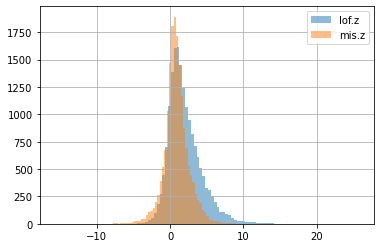

In [67]:
gnomad4_lofz_rank["lof.z_score"].hist(bins=100, label="lof.z", alpha=0.5)
gnomad4_lofz_rank["mis.z_score"].hist(bins=100, label="mis.z", alpha=0.5)
plt.legend()

<AxesSubplot: >

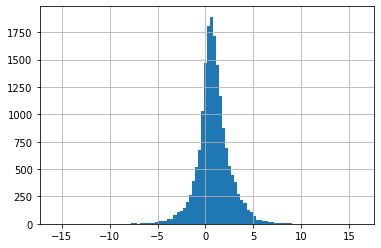

In [60]:
DIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/Other/gnomad4_LoFZ"
for cut in range(1000, 19000, 1000):
    print(cut)
    genes = gnomad4_lofz_rank.head(cut).tail(1000)["Entrez"]
    genes = [int(x) for x in genes]
    gw = dict(zip(genes, [1]*len(genes)))
    Dict2Fil(gw, "{}/gw.LoFZ.rank.{}-{}.csv".format(DIR, cut-1000, cut))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


In [77]:
for g in gnomad4_lofz_rank.head(1000).tail(1000)["gene"].values:
    print(g)

TTN
MACF1
DYNC1H1
LRP1
DST
KMT2D
UBR4
TRRAP
FBN1
USP34
KMT2A
UBR5
PRKDC
BIRC6
MYCBP2
HERC2
WDFY3
ANK3
KMT2C
SMG1
PCLO
SYNE1
LRP2
CNOT1
MDN1
BPTF
HERC1
CHD7
RELN
COL5A1
HECTD4
SPEN
SPTAN1
TRIO
SYNE2
ASH1L
CREBBP
NIPBL
ANK2
MED13L
SPTBN1
ZFHX3
SUPT6H
TPR
RANBP2
KALRN
TLN1
MYH9
EP300
NSD1
PRPF8
ZNF462
TRIP12
MTOR
CHD8
ANKRD17
KMT2B
EIF4G1
NBEA
VPS13D
SRCAP
NOTCH2
SPTB
CHD4
MGA
FBN2
AHCTF1
RYR3
ANKHD1
ZFHX4
VCAN
CSMD2
LRP1B
CHD6
DNMT1
SETD2
PRRC2C
FAT4
MED13
ARID1A
SRRM2
ANKRD11
EP400
MED12L
CKAP5
JMJD1C
CHD3
BSN
HIVEP2
FAT3
KAT6B
ZNF292
NOTCH1
CLTC
MAP1B
REV3L
COL1A1
RYR2
TCF20
HECTD1
COL12A1
CHD2
COL2A1
GREB1L
MYH10
PTPRD
CUL9
WNK1
COL4A1
SON
KAT6A
NCOR1
BTAF1
SNRNP200
SCN1A
TSC2
COL5A2
DNAJC13
TNRC6A
USP7
USP24
HMCN1
ARID1B
NEB
BAZ2A
MUC5B
RLF
TENM3
CACNA1D
DOCK3
HTT
FASN
ARFGEF1
ITPR1
HELZ
NUP98
CACNA1C
SCN2A
DMXL2
COPA
ACACA
DSCAM
CELSR3
MARF1
ESPL1
DSCAML1
SMARCA4
NSD3
DIP2C
NAV2
KDM3B
ANK1
CDC42BPB
NUMA1
APC
AKAP13
CIT
ARID2
PTCH1
DMXL1
ZMYM4
PREX1
FN1
PRRC2A
PKD1
CHD9
MAP1A
SCN8A
D

#### gnomad 4.0 misZ

In [78]:
gnomad4.head(2)

,Entrez,gene,transcript,lof_hc_lc.obs,lof_hc_lc.exp,lof.pLI,lof.z_score,mis.z_score
0,1.0,A1BG,ENST00000263100,45.0,43.008,1.712900e-16,-0.25714,-0.86948
6,29974.0,A1CF,ENST00000373997,45.0,69.896,7.432800e-10,2.52040,1.22810


In [79]:
gnomad4_misz_rank = gnomad4.sort_values("mis.z_score", ascending=False)

In [81]:
DIR = "/home/jw3514/Work/UNIMED/dat/Genetics/GeneWeights/Other/gnomad4_MisZ"
if not os.path.exists(DIR):
    os.makedirs(DIR)
for cut in range(1000, 19000, 1000):
    print(cut)
    genes = gnomad4_misz_rank.head(cut).tail(1000)["Entrez"]
    genes = [int(x) for x in genes]
    gw = dict(zip(genes, [1]*len(genes)))
    Dict2Fil(gw, "{}/gw.MisZ.rank.{}-{}.csv".format(DIR, cut-1000, cut))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
